<a href="https://colab.research.google.com/github/Billy-code123/testpro/blob/main/25_01_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[κείμενο συνδέσμου](https://)Δοκιμη ολων των μοντελων με dataset 20% και πινακες αποτελεσματων και διαγραμματα. χρηση τιτλου + σχολια

---



---




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Paths to your datasets in Google Drive
base_path = '/content/drive/MyDrive/MSc Artificial Intelligence/Professional Practice & Research Methodology/Fakeddit dataset'
train_file = base_path + '/all_train.tsv'
test_file = base_path + '/all_test_public.tsv'
validate_file = base_path + '/all_validate.tsv'
comments_file = base_path + '/all_comments.tsv'


In [ ]:
import pandas as pd

# Load the datasets
df_train = pd.read_csv(train_file, sep='\t')
df_test = pd.read_csv(test_file, sep='\t')
df_validate = pd.read_csv(validate_file, sep='\t')
df_comments = pd.read_csv(comments_file, sep='\t', engine='python')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 6.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


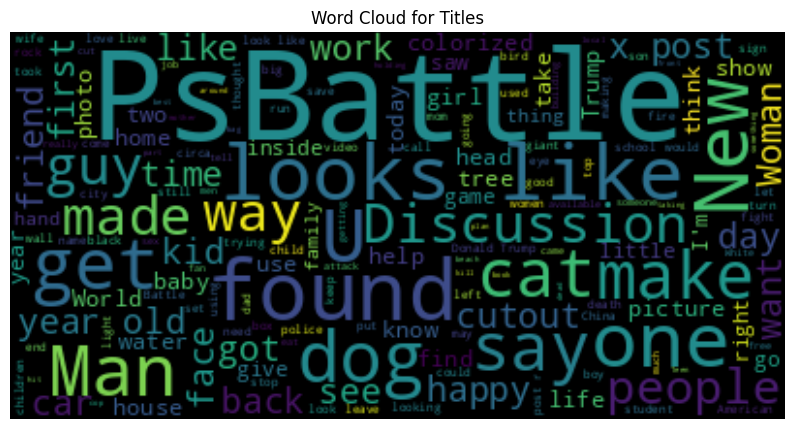

In [ ]:
!pip install wordcloud
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Combine titles into one string and generate word cloud
title_text = ' '.join(df_train['title'].dropna().astype(str))
wordcloud = WordCloud(stopwords=stopwords.words('english')).generate(title_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Titles')
plt.axis('off')
plt.show()


In [ ]:
# Drop identified unnecessary columns in all datasets
columns_to_drop = ['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']

df_train.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)
df_validate.drop(columns=columns_to_drop, inplace=True)
df_comments.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
# Drop linked_submission_id from each dataset
for df in [df_train, df_test, df_validate]:
    df.drop(columns=['linked_submission_id'], inplace=True)


In [ ]:
# Fill missing values in Train, Test, and Validate datasets
for df in [df_train, df_test, df_validate]:
    # Fill categorical or text columns with a placeholder
    df['domain'].fillna("unknown", inplace=True)
    df['author'].fillna("unknown", inplace=True)
    df['image_url'].fillna("no_image", inplace=True)
    df['title'].fillna("missing", inplace=True)
    df['clean_title'].fillna("missing", inplace=True)

    # Fill numerical columns with specific values
    df['num_comments'].fillna(0, inplace=True)  # assuming missing comments = 0
    df['upvote_ratio'].fillna(df['upvote_ratio'].mean(), inplace=True)  # filling with mean

# Handle missing values in the Comments dataset
df_comments['author'].fillna("unknown", inplace=True)
df_comments['body'].fillna("missing", inplace=True)
df_comments['parent_id'].fillna("missing", inplace=True)
df_comments['submission_id'].fillna("missing", inplace=True)
df_comments['ups'].fillna(0, inplace=True)  # assuming missing upvotes = 0


<ipython-input-9-6d2aa45e4670>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['domain'].fillna("unknown", inplace=True)
<ipython-input-9-6d2aa45e4670>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.4 MB/s eta 0:00:00


In [ ]:
!pip install transformers==4.30.2
!pip install tensorflow==2.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Combine Train and Validate datasets if needed
df_combined = pd.concat([df_train, df_validate])

# Reduce dataset size to 10% while maintaining class distribution
df_reduced, _ = train_test_split(df_combined, test_size=0.9, stratify=df_combined['2_way_label'], random_state=42)

# Split reduced dataset into Train, Validate, and Test sets
df_train_new, df_temp = train_test_split(df_reduced, test_size=0.3, stratify=df_reduced['2_way_label'], random_state=42)
df_validate_new, df_test_new = train_test_split(df_temp, test_size=0.5, stratify=df_temp['2_way_label'], random_state=42)

# Verify dataset sizes
print("Reduced Dataset Sizes:")
print("Train:", df_train_new.shape[0], "| Validate:", df_validate_new.shape[0], "| Test:", df_test_new.shape[0])

# Define target variables
y_train = df_train_new['2_way_label']
y_validate = df_validate_new['2_way_label']
y_test = df_test_new['2_way_label']


Reduced Dataset Sizes:
Train: 67946 | Validate: 14560 | Test: 14560


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_title = tfidf.fit_transform(df_train_new['title'].fillna(''))
X_validate_title = tfidf.transform(df_validate_new['title'].fillna(''))
X_test_title = tfidf.transform(df_test_new['title'].fillna(''))

print("TF-IDF Transformation Completed")
print("Feature Matrix Shape:", X_train_title.shape)


TF-IDF Transformation Completed
Feature Matrix Shape: (67946, 1000)


In [ ]:
from sklearn.metrics import accuracy_score

# Function to run experiments
def run_experiment(model, X_train, y_train, X_validate, y_validate):
    model.fit(X_train, y_train)
    val_preds = model.predict(X_validate)
    validate_accuracy = accuracy_score(y_validate, val_preds)
    return model, validate_accuracy


Δοκιμη αρχικων μοντελων με την προσθηκη σχολιων

In [ ]:
# Check if all submission_ids in comments exist in the train dataset
comments_in_train = df_comments['submission_id'].isin(df_train['id']).sum()
print(f"Number of comments linked to posts in Train Dataset: {comments_in_train}/{df_comments.shape[0]}")

# Check if all submission_ids in comments exist in the validate dataset
comments_in_validate = df_comments['submission_id'].isin(df_validate['id']).sum()
print(f"Number of comments linked to posts in Validate Dataset: {comments_in_validate}/{df_comments.shape[0]}")

# Check if all submission_ids in comments exist in the test dataset
comments_in_test = df_comments['submission_id'].isin(df_test['id']).sum()
print(f"Number of comments linked to posts in Test Dataset: {comments_in_test}/{df_comments.shape[0]}")


Number of comments linked to posts in Train Dataset: 7769939/10002177
Number of comments linked to posts in Validate Dataset: 842645/10002177
Number of comments linked to posts in Test Dataset: 829106/10002177


In [ ]:
# Check for duplicate submission_ids in comments
duplicate_comments = df_comments.duplicated(subset=['submission_id']).sum()
print(f"Number of duplicate submission_ids in Comments Dataset: {duplicate_comments}")


Number of duplicate submission_ids in Comments Dataset: 9383228


In [ ]:
# Check for posts in Train without comments
posts_without_comments_train = df_train[~df_train['id'].isin(df_comments['submission_id'])]
print(f"Number of posts in Train without comments: {posts_without_comments_train.shape[0]}")

# Check for posts in Validate without comments
posts_without_comments_validate = df_validate[~df_validate['id'].isin(df_comments['submission_id'])]
print(f"Number of posts in Validate without comments: {posts_without_comments_validate.shape[0]}")

# Check for posts in Test without comments
posts_without_comments_test = df_test[~df_test['id'].isin(df_comments['submission_id'])]
print(f"Number of posts in Test without comments: {posts_without_comments_test.shape[0]}")


Number of posts in Train without comments: 395794
Number of posts in Validate without comments: 41722
Number of posts in Test without comments: 41492


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Combine Train and Validate datasets if needed
df_combined = pd.concat([df_train, df_validate])

# Reduce dataset size to 10% while maintaining class distribution
df_reduced, _ = train_test_split(df_combined, test_size=0.9, stratify=df_combined['2_way_label'], random_state=42)

# Split reduced dataset into Train, Validate, and Test sets
df_train_new, df_temp = train_test_split(df_reduced, test_size=0.3, stratify=df_reduced['2_way_label'], random_state=42)
df_validate_new, df_test_new = train_test_split(df_temp, test_size=0.5, stratify=df_temp['2_way_label'], random_state=42)

# Verify dataset sizes
print("Reduced Dataset Sizes:")
print("Train:", df_train_new.shape[0], "| Validate:", df_validate_new.shape[0], "| Test:", df_test_new.shape[0])

# Define target variables
y_train = df_train_new['2_way_label']
y_validate = df_validate_new['2_way_label']
y_test = df_test_new['2_way_label']

# Aggregate comments by submission_id
df_comments_aggregated = df_comments.groupby('submission_id')['body'].apply(
    lambda x: ' '.join(x.dropna())
).reset_index()

# Merge aggregated comments with Train, Validate, and Test datasets
df_train_combined = df_train_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_validate_combined = df_validate_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_test_combined = df_test_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')

# Combine title and comments into a single feature
df_train_combined['combined_text'] = df_train_combined['title'].fillna('') + " " + df_train_combined['body'].fillna('')
df_validate_combined['combined_text'] = df_validate_combined['title'].fillna('') + " " + df_validate_combined['body'].fillna('')
df_test_combined['combined_text'] = df_test_combined['title'].fillna('') + " " + df_test_combined['body'].fillna('')

# Verify combined text
print("Sample Combined Text:")
print(df_train_combined['combined_text'].head())


Reduced Dataset Sizes:
Train: 67946 | Validate: 14560 | Test: 14560
Sample Combined Text:
0    Political Machines – Solitude Released in 1978...
1    The start of world war 2, September 1939 (colo...
2                                             missing 
3                                                UTFY 
4    Crystal Pepsi is making a comeback aww, i'm gl...
Name: combined_text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_train_combined = tfidf.fit_transform(df_train_combined['combined_text'])
X_validate_combined = tfidf.transform(df_validate_combined['combined_text'])
X_test_combined = tfidf.transform(df_test_combined['combined_text'])

print("TF-IDF Transformation Completed")
print("Feature Matrix Shape (Combined):", X_train_combined.shape)


TF-IDF Transformation Completed
Feature Matrix Shape (Combined): (67946, 2000)


In [ ]:
from sklearn.metrics import accuracy_score

# Function to run experiments
def run_experiment(model, X_train, y_train, X_validate, y_validate):
    model.fit(X_train, y_train)
    val_preds = model.predict(X_validate)
    validate_accuracy = accuracy_score(y_validate, val_preds)
    return model, validate_accuracy


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
nb_model = MultinomialNB()
_, val_acc_nb = run_experiment(nb_model, X_train_combined, y_train, X_validate_combined, y_validate)
print(f"Naive Bayes Validation Accuracy: {val_acc_nb:.4f}")


Naive Bayes Validation Accuracy: 0.7295


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
_, val_acc_lr = run_experiment(lr_model, X_train_combined, y_train, X_validate_combined, y_validate)
print(f"Logistic Regression Validation Accuracy: {val_acc_lr:.4f}")


Logistic Regression Validation Accuracy: 0.8324


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
_, val_acc_rf = run_experiment(rf_model, X_train_combined, y_train, X_validate_combined, y_validate)
print(f"Random Forest Validation Accuracy: {val_acc_rf:.4f}")


Random Forest Validation Accuracy: 0.7460


In [ ]:
from lightgbm import LGBMClassifier

# LightGBM
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=10, random_state=42)
_, val_acc_lgbm = run_experiment(lgbm_model, X_train_combined, y_train, X_validate_combined, y_validate)
print(f"LightGBM Validation Accuracy: {val_acc_lgbm:.4f}")


[LightGBM] [Info] Number of positive: 30980, number of negative: 36966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.497635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421126
[LightGBM] [Info] Number of data points in the train set: 67946, number of used features: 2000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455950 -> initscore=-0.176657
[LightGBM] [Info] Start training from score -0.176657
LightGBM Validation Accuracy: 0.8380


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Scale the TF-IDF features for MLP
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_combined)
X_validate_scaled = scaler.transform(X_validate_combined)

# MLP Model
def train_mlp(X_train, y_train, X_validate, y_validate):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_validate, y_validate), verbose=1)
    val_loss, val_accuracy = model.evaluate(X_validate, y_validate, verbose=0)
    return model, val_accuracy
    _, val_acc_mlp = train_mlp(X_train_scaled, y_train, X_validate_scaled, y_validate)
print(f"MLP Validation Accuracy: {val_acc_mlp:.4f}")


MLP Validation Accuracy: 0.7977


In [ ]:
# Collect results
results = [
    {'Model': 'Naive Bayes', 'Validation Accuracy': val_acc_nb},
    {'Model': 'Logistic Regression', 'Validation Accuracy': val_acc_lr},
    {'Model': 'Random Forest', 'Validation Accuracy': val_acc_rf},
    {'Model': 'LightGBM', 'Validation Accuracy': val_acc_lgbm},
    {'Model': 'MLP', 'Validation Accuracy': val_acc_mlp}
]

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\nValidation Results with Title + Comments:")
print(results_df)

# Save results to CSV
results_df.to_csv('validation_results.csv', index=False)



Validation Results with Title + Comments:
                 Model  Validation Accuracy
0          Naive Bayes             0.729464
1  Logistic Regression             0.832418
2        Random Forest             0.746016
3             LightGBM             0.838049
4                  MLP             0.797734


Προσθηκε tinybert και BiLSTM με την προσθηκη σχολιων

In [ ]:
# Combine title and comments into a single text field
df_train_combined = df_train_new.copy()
df_validate_combined = df_validate_new.copy()

# Ensure comments are linked to the posts
df_train_combined['comments'] = df_train_combined['id'].map(
    df_comments.groupby('submission_id')['body'].apply(lambda x: ' '.join(x.dropna()))
)
df_validate_combined['comments'] = df_validate_combined['id'].map(
    df_comments.groupby('submission_id')['body'].apply(lambda x: ' '.join(x.dropna()))
)

# Fill missing comments with empty strings
df_train_combined['comments'] = df_train_combined['comments'].fillna('')
df_validate_combined['comments'] = df_validate_combined['comments'].fillna('')

# Create a combined text column
df_train_combined['combined_text'] = df_train_combined['title'].fillna('') + " " + df_train_combined['comments']
df_validate_combined['combined_text'] = df_validate_combined['title'].fillna('') + " " + df_validate_combined['comments']


In [ ]:
from transformers import BertTokenizer

# Load TinyBERT Tokenizer
tinybert_tokenizer = BertTokenizer.from_pretrained('google/bert_uncased_L-4_H-512_A-8')

# Tokenize combined text for TinyBERT
train_encodings = tinybert_tokenizer(
    list(df_train_combined['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="tf"
)
validate_encodings = tinybert_tokenizer(
    list(df_validate_combined['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="tf"
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and Pad Sequences for BiLSTM
max_len = 128
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size)

# Fit tokenizer on training data
tokenizer.fit_on_texts(df_train_combined['combined_text'])

# Convert text to sequences and pad them
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(df_train_combined['combined_text']), maxlen=max_len)
X_validate_seq = pad_sequences(tokenizer.texts_to_sequences(df_validate_combined['combined_text']), maxlen=max_len)


In [ ]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load TinyBERT Model
tinybert_model = TFBertForSequenceClassification.from_pretrained(
    'google/bert_uncased_L-4_H-512_A-8',
    num_labels=2,
    from_pt=True
)

# TinyBERT Training Function
def train_tinybert(train_encodings, y_train, validate_encodings, y_validate):
    # Convert labels to TensorFlow tensors
    y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
    y_validate = tf.convert_to_tensor(y_validate, dtype=tf.int32)

    # Prepare Dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(16)
    validate_dataset = tf.data.Dataset.from_tensor_slices((dict(validate_encodings), y_validate)).batch(16)

    # Compile Model
    optimizer = Adam(learning_rate=5e-5)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    tinybert_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

    # Train Model
    print("Starting TinyBERT training...")
    tinybert_model.fit(train_dataset, validation_data=validate_dataset, epochs=3)

    # Validate Accuracy
    print("Evaluating TinyBERT on validation set...")
    val_loss, val_accuracy = tinybert_model.evaluate(validate_dataset)
    return tinybert_model, val_accuracy


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# BiLSTM Training Function
def train_bilstm(X_train, y_train, X_validate, y_validate, vocab_size, max_len):
    # Build Model
    model = Sequential([
        Embedding(vocab_size, 128, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train Model
    model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_validate, y_validate), verbose=1)

    # Validate Accuracy
    val_loss, val_accuracy = model.evaluate(X_validate, y_validate, verbose=0)
    return model, val_accuracy


In [ ]:
# Results Storage
results = []

# TinyBERT
_, val_acc_tinybert = train_tinybert(train_encodings, y_train, validate_encodings, y_validate)
results.append({'Model': 'TinyBERT', 'Validation Accuracy': val_acc_tinybert})

# BiLSTM
_, val_acc_bilstm = train_bilstm(X_train_seq, y_train, X_validate_seq, y_validate, vocab_size=vocab_size, max_len=max_len)
results.append({'Model': 'BiLSTM', 'Validation Accuracy': val_acc_bilstm})

# Log Results
results_df = pd.DataFrame(results)
print("\nValidation Results for TinyBERT and BiLSTM:")
print(results_df)

# Save results to CSV
results_df.to_csv('validation_results_tinybert_bilstm_with_comments.csv', index=False)

Starting TinyBERT training...
Epoch 1/3
4247/4247 [==============================] - 2462s 578ms/step - loss: 0.2177 - accuracy: 0.9100 - val_loss: 0.1787 - val_accuracy: 0.9310
Epoch 2/3
4247/4247 [==============================] - 2404s 566ms/step - loss: 0.1337 - accuracy: 0.9489 - val_loss: 0.2057 - val_accuracy: 0.9273
Epoch 3/3
4247/4247 [==============================] - 2404s 566ms/step - loss: 0.0834 - accuracy: 0.9706 - val_loss: 0.2593 - val_accuracy: 0.9203
Evaluating TinyBERT on validation set...
910/910 [==============================] - 142s 156ms/step - loss: 0.2593 - accuracy: 0.9203
Epoch 1/3
1062/1062 [==============================] - 102s 93ms/step - loss: 0.3535 - accuracy: 0.8347 - val_loss: 0.3115 - val_accuracy: 0.8634
Epoch 2/3
1062/1062 [==============================] - 98s 92ms/step - loss: 0.2668 - accuracy: 0.8863 - val_loss: 0.2878 - val_accuracy: 0.8724
Epoch 3/3
1062/1062 [==============================] - 99s 93ms/step - loss: 0.2251 - accuracy: 0.906

25/01 new code for title and comments test on all models 20% dataset

In [ ]:
!pip install transformers==4.30.2
!pip install tensorflow==2.12.0

In [ ]:
!pip install lightgbm

τα αποτελεσματα δεν ταιριαζουν με αυτα του πρωτου σταδιου με τη χρηση τιτλου

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-4-7cfe1e8d466f>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['domain'].fillna("unknown", inplace=True)
<ipython-input-4-7cfe1e8d466f>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

TF-IDF Transformation Completed
Feature Matrix Shape (Combined): (135892, 2000)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61960, number of negative: 73932
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.614036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 502374
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 2000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455950 -> initscore=-0.176657
[LightGBM] [Info] Start training from score -0.176657


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training MLP Model...
Epoch 1/5
2124/2124 [==============================] - 13s 5ms/step - loss: 0.3607 - accuracy: 0.8329 - val_loss: 0.3068 - val_accuracy: 0.8612
Epoch 2/5
2124/2124 [==============================] - 11s 5ms/step - loss: 0.2900 - accuracy: 0.8728 - val_loss: 0.2985 - val_accuracy: 0.8649
Epoch 3/5
2124/2124 [==============================] - 11s 5ms/step - loss: 0.2545 - accuracy: 0.8913 - val_loss: 0.2940 - val_accuracy: 0.8688
Epoch 4/5
2124/2124 [==============================] - 11s 5ms/step - loss: 0.2203 - accuracy: 0.9089 - val_loss: 0.2991 - val_accuracy: 0.8676
Epoch 5/5
910/910 [==============================] - 1s 1ms/step
Evaluation for MLP:
Training Accuracy: 0.9525
Validation Accuracy: 0.8683
Precision: 0.8865
Recall: 0.8156
F1 Score: 0.8496
ROC-AUC: 0.9439
Confusion Matrix:
[[14457  1386]
 [ 2448 10829]]

MLP Results:
  Model  Train Accuracy  Validation Accuracy  Precision    Recall  F1 Score  \
0   MLP        0.952462             0.868338   0.886533

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/116M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_tf_pytorch_utils.py:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pt_state_dict.update(torch.load(pt_path,

Starting TinyBERT training...
Epoch 1/3
8494/8494 [==============================] - 4605s 541ms/step - loss: 0.1981 - accuracy: 0.9193 - val_loss: 0.1942 - val_accuracy: 0.9230
Epoch 2/3
8494/8494 [==============================] - 4543s 535ms/step - loss: 0.1280 - accuracy: 0.9516 - val_loss: 0.1903 - val_accuracy: 0.9328
Epoch 3/3
1820/1820 [==============================] - 276s 150ms/step

TinyBERT Results:
Accuracy: 0.9338
Precision: 0.9226
Recall: 0.9332
F1-Score: 0.9278
Confusion Matrix:
[[14803  1040]
 [  887 12390]]

TinyBERT Evaluation Results:
{'Model': 'TinyBERT', 'Accuracy': 0.9338255494505494, 'Precision': 0.9225614296351452, 'Recall': 0.9331927393236424, 'F1-Score': 0.9278466319691466, 'Confusion Matrix': [[14803, 1040], [887, 12390]]}
Epoch 1/3
2124/2124 [==============================] - 188s 87ms/step - loss: 0.3375 - accuracy: 0.8443 - val_loss: 0.2876 - val_accuracy: 0.8691
Epoch 2/3
2124/2124 [==============================] - 184s 87ms/step - loss: 0.2641 - accur

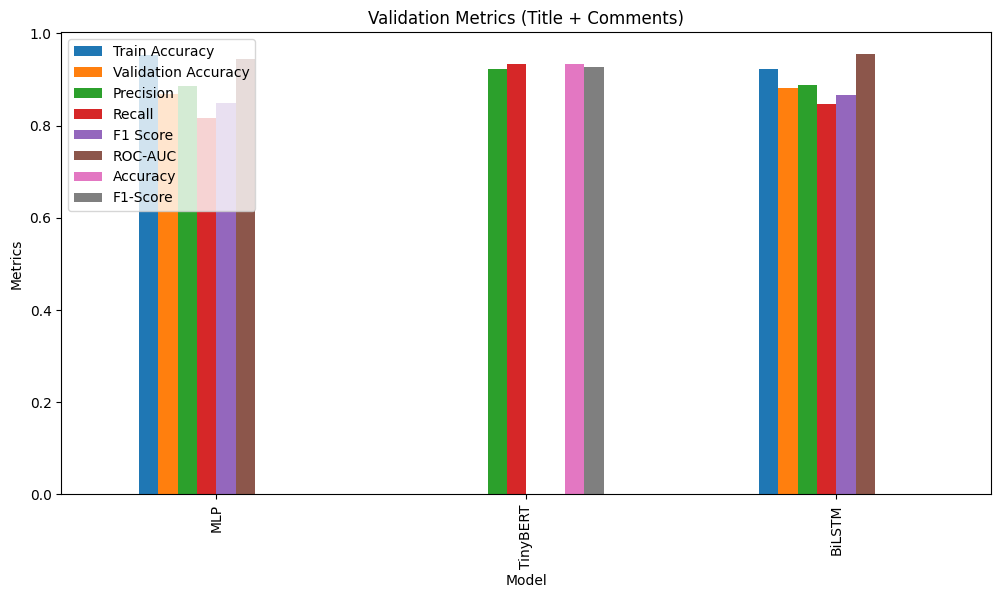

In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

# Paths to your datasets in Google Drive
base_path = '/content/drive/MyDrive/MSc Artificial Intelligence/Professional Practice & Research Methodology/Fakeddit dataset'
train_file = base_path + '/all_train.tsv'
test_file = base_path + '/all_test_public.tsv'
validate_file = base_path + '/all_validate.tsv'
comments_file = base_path + '/all_comments.tsv'

# Load datasets
import pandas as pd
df_train = pd.read_csv(train_file, sep='\t')
df_test = pd.read_csv(test_file, sep='\t')
df_validate = pd.read_csv(validate_file, sep='\t')
df_comments = pd.read_csv(comments_file, sep='\t', engine='python')

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']
for df in [df_train, df_test, df_validate]:
    df.drop(columns=columns_to_drop, inplace=True)
df_comments.drop(columns=['Unnamed: 0'], inplace=True)

# Drop linked_submission_id
for df in [df_train, df_test, df_validate]:
    df.drop(columns=['linked_submission_id'], inplace=True)

# Fill missing values
for df in [df_train, df_test, df_validate]:
    df['domain'].fillna("unknown", inplace=True)
    df['author'].fillna("unknown", inplace=True)
    df['image_url'].fillna("no_image", inplace=True)
    df['title'].fillna("missing", inplace=True)
    df['clean_title'].fillna("missing", inplace=True)
    df['num_comments'].fillna(0, inplace=True)
    df['upvote_ratio'].fillna(df['upvote_ratio'].mean(), inplace=True)

df_comments['author'].fillna("unknown", inplace=True)
df_comments['body'].fillna("missing", inplace=True)
df_comments['parent_id'].fillna("missing", inplace=True)
df_comments['submission_id'].fillna("missing", inplace=True)
df_comments['ups'].fillna(0, inplace=True)

# Reduce dataset size to 20%
from sklearn.model_selection import train_test_split
df_combined = pd.concat([df_train, df_validate])
df_reduced, _ = train_test_split(df_combined, test_size=0.8, stratify=df_combined['2_way_label'], random_state=42)

# Split reduced dataset into train, validate, and test
df_train_new, df_temp = train_test_split(df_reduced, test_size=0.3, stratify=df_reduced['2_way_label'], random_state=42)
df_validate_new, df_test_new = train_test_split(df_temp, test_size=0.5, stratify=df_temp['2_way_label'], random_state=42)

# Define target variables
y_train = df_train_new['2_way_label']
y_validate = df_validate_new['2_way_label']
y_test = df_test_new['2_way_label']

# Aggregate comments
df_comments_aggregated = df_comments.groupby('submission_id')['body'].apply(lambda x: ' '.join(x.dropna())).reset_index()

# Merge comments with train, validate, and test datasets
df_train_combined = df_train_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_validate_combined = df_validate_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_test_combined = df_test_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')

# Combine title and comments
df_train_combined['combined_text'] = df_train_combined['title'].fillna('') + " " + df_train_combined['body'].fillna('')
df_validate_combined['combined_text'] = df_validate_combined['title'].fillna('') + " " + df_validate_combined['body'].fillna('')
df_test_combined['combined_text'] = df_test_combined['title'].fillna('') + " " + df_test_combined['body'].fillna('')

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_train_combined = tfidf.fit_transform(df_train_combined['combined_text'])
X_validate_combined = tfidf.transform(df_validate_combined['combined_text'])
X_test_combined = tfidf.transform(df_test_combined['combined_text'])

print("TF-IDF Transformation Completed")
print("Feature Matrix Shape (Combined):", X_train_combined.shape)

# Function to evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import time

def evaluate_model(model, X_train, y_train, X_validate, y_validate, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    val_preds = model.predict(X_validate)
    val_time = time.time() - start_time

    accuracy = accuracy_score(y_validate, val_preds)
    precision = precision_score(y_validate, val_preds, average='binary')
    recall = recall_score(y_validate, val_preds, average='binary')
    f1 = f1_score(y_validate, val_preds, average='binary')
    conf_matrix = confusion_matrix(y_validate, val_preds)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': val_time,
        'Confusion Matrix': conf_matrix
    }

# Evaluate models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

results = []

# Naive Bayes
nb_model = MultinomialNB()
results.append(evaluate_model(nb_model, X_train_combined, y_train, X_validate_combined, y_validate, "Naive Bayes"))

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
results.append(evaluate_model(lr_model, X_train_combined, y_train, X_validate_combined, y_validate, "Logistic Regression"))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(evaluate_model(rf_model, X_train_combined, y_train, X_validate_combined, y_validate, "Random Forest"))

# LightGBM
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(evaluate_model(lgbm_model, X_train_combined, y_train, X_validate_combined, y_validate, "LightGBM"))

# Convert sparse matrix to dense for MLP
X_train_dense = X_train_combined.toarray()
X_validate_dense = X_validate_combined.toarray()

# Scale the dense features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dense)
X_validate_scaled = scaler.transform(X_validate_dense)

# MLP Model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Define the function to train the MLP model
def train_mlp(X_train, y_train, X_validate, y_validate):
    """
    Train an MLP model and return the trained model.
    """
    # Convert sparse matrices to dense arrays
    if not isinstance(X_train, np.ndarray):
        X_train = X_train.toarray()
    if not isinstance(X_validate, np.ndarray):
        X_validate = X_validate.toarray()

    # Build the MLP model
    model = Sequential([
        Dense(256, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_validate, y_validate), verbose=1)
    return model

# Define the function to evaluate the MLP model
def evaluate_model(model, X_train, y_train, X_validate, y_validate, model_name):
    """
    Evaluate the given model using various metrics and return a dictionary of results.
    """
    # Convert sparse matrices to dense arrays
    if not isinstance(X_train, np.ndarray):
        X_train = X_train.toarray()
    if not isinstance(X_validate, np.ndarray):
        X_validate = X_validate.toarray()

    # Make predictions
    train_preds = (model.predict(X_train) > 0.5).astype("int32").flatten()  # Convert probabilities to binary
    val_preds = (model.predict(X_validate) > 0.5).astype("int32").flatten()  # Convert probabilities to binary

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_preds)
    val_accuracy = accuracy_score(y_validate, val_preds)
    precision = precision_score(y_validate, val_preds, average='binary')
    recall = recall_score(y_validate, val_preds, average='binary')
    f1 = f1_score(y_validate, val_preds, average='binary')
    roc_auc = roc_auc_score(y_validate, model.predict(X_validate))
    conf_matrix = confusion_matrix(y_validate, val_preds)

    # Print metrics
    print(f"Evaluation for {model_name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    return {
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": conf_matrix.tolist(),  # Save as list for compatibility
    }

# Scale the TF-IDF features for MLP
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_combined)  # Assuming `X_train_combined` is TF-IDF transformed
X_validate_scaled = scaler.transform(X_validate_combined)

# Train MLP and evaluate
print("Training MLP Model...")
mlp_model = train_mlp(X_train_scaled, y_train, X_validate_scaled, y_validate)
results = []
results.append(evaluate_model(mlp_model, X_train_scaled, y_train, X_validate_scaled, y_validate, "MLP"))

# Convert results to DataFrame for saving or visualization
import pandas as pd

results_df = pd.DataFrame(results)
print("\nMLP Results:")
print(results_df)

# Save results to CSV
results_df.to_csv('mlp_results.csv', index=False)

# TinyBERT
from transformers import TFBertForSequenceClassification, BertTokenizer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import numpy as np

# Load TinyBERT Tokenizer and Model
tinybert_tokenizer = BertTokenizer.from_pretrained('google/bert_uncased_L-4_H-512_A-8')
tinybert_model = TFBertForSequenceClassification.from_pretrained(
    'google/bert_uncased_L-4_H-512_A-8', num_labels=2, from_pt=True
)

# Tokenize Combined Text for Train and Validation
train_encodings = tinybert_tokenizer(
    list(df_train_combined['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="tf"
)
validate_encodings = tinybert_tokenizer(
    list(df_validate_combined['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="tf"
)

# TinyBERT Training Function
def train_tinybert(model, train_encodings, y_train, validate_encodings, y_validate):

    # Convert labels to TensorFlow tensors
    y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
    y_validate = tf.convert_to_tensor(y_validate, dtype=tf.int32)

    # Prepare Datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(16)
    validate_dataset = tf.data.Dataset.from_tensor_slices((dict(validate_encodings), y_validate)).batch(16)

    # Compile Model
    optimizer = Adam(learning_rate=5e-5)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

    # Train Model
    print("Starting TinyBERT training...")
    model.fit(train_dataset, validation_data=validate_dataset, epochs=3)
    return model

# Train TinyBERT
tinybert_model = train_tinybert(tinybert_model, train_encodings, y_train, validate_encodings, y_validate)

# TinyBERT Evaluation Function
def evaluate_tinybert_model(model, train_encodings, y_train, validate_encodings, y_validate, model_name):

    # Prepare Datasets
    validate_dataset = tf.data.Dataset.from_tensor_slices((dict(validate_encodings), y_validate)).batch(16)

    # Get Predictions
    val_logits = model.predict(validate_dataset).logits
    val_preds = np.argmax(val_logits, axis=1)

    # Metrics
    accuracy = accuracy_score(y_validate, val_preds)
    precision = precision_score(y_validate, val_preds, average='binary')
    recall = recall_score(y_validate, val_preds, average='binary')
    f1 = f1_score(y_validate, val_preds, average='binary')
    cm = confusion_matrix(y_validate, val_preds)

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": cm.tolist(),  # Convert to list for JSON-like handling
    }

# Evaluate TinyBERT
tinybert_results = evaluate_tinybert_model(
    tinybert_model, train_encodings, y_train, validate_encodings, y_validate, "TinyBERT"
)
results.append(tinybert_results)

# Print Results
print("\nTinyBERT Evaluation Results:")
print(tinybert_results)

# BiLSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Tokenize and pad sequences for BiLSTM
max_len = 128
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_train_combined['combined_text'])

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(df_train_combined['combined_text']), maxlen=max_len)
X_validate_seq = pad_sequences(tokenizer.texts_to_sequences(df_validate_combined['combined_text']), maxlen=max_len)

def train_bilstm(X_train, y_train, X_validate, y_validate):
    model = Sequential([
        Embedding(vocab_size, 128, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_validate, y_validate), verbose=1)
    return model

bilstm_model = train_bilstm(X_train_seq, y_train, X_validate_seq, y_validate)
bilstm_preds = (bilstm_model.predict(X_validate_seq) > 0.5).astype("int32").flatten()
results.append(evaluate_model(bilstm_model, X_train_seq, y_train, X_validate_seq, y_validate, "BiLSTM"))

# Save and Display Results
import pandas as pd
results_df = pd.DataFrame(results)
results_df.drop(columns=['Confusion Matrix'], inplace=True)
print("\nValidation Results (Title + Comments):")
print(results_df)

# Save to CSV
results_df.to_csv('validation_results_title_comments.csv', index=False)

# Visualize results
import matplotlib.pyplot as plt

results_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title("Validation Metrics (Title + Comments)")
plt.xlabel("Model")
plt.ylabel("Metrics")
plt.legend(loc='upper left')
plt.show()



Validation Results (Title + Comments):
      Model  Train Accuracy  Validation Accuracy  Precision    Recall  \
0       MLP        0.952462             0.868338   0.886533  0.815621   
1  TinyBERT             NaN                  NaN   0.922561  0.933193   
2    BiLSTM        0.923689             0.881319   0.887050  0.847631   

   F1 Score   ROC-AUC  Accuracy  F1-Score  
0  0.849600  0.943882       NaN       NaN  
1       NaN       NaN  0.933826  0.927847  
2  0.866893  0.954806       NaN       NaN  


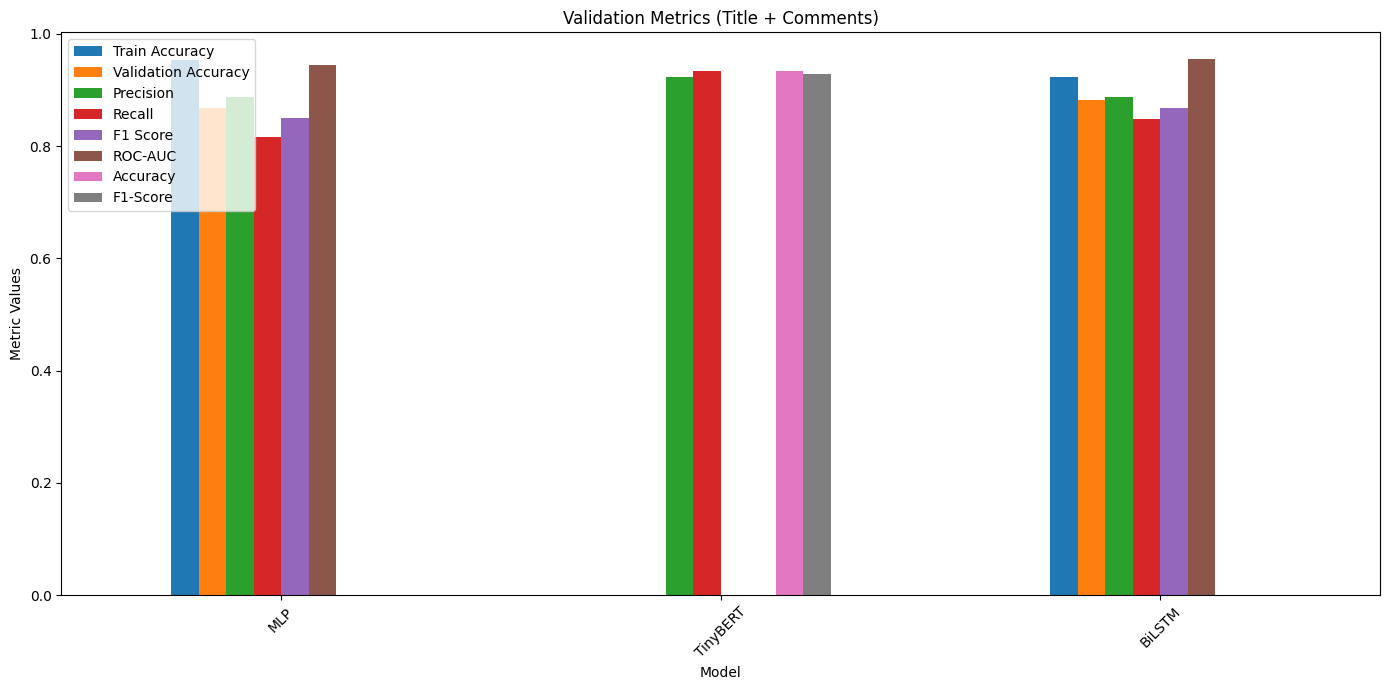

KeyError: 'Runtime (seconds)'

In [ ]:
# Save and Display Results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)

# Drop the confusion matrices column for a cleaner view of numerical metrics
results_df_numerical = results_df.drop(columns=['Confusion Matrix'], inplace=False)
print("\nValidation Results (Title + Comments):")
print(results_df_numerical)

# Save numerical results to CSV
results_df_numerical.to_csv('validation_results_title_comments.csv', index=False)

# Save confusion matrices separately
confusion_matrices = {result['Model']: result['Confusion Matrix'] for result in results}
np.savez('confusion_matrices_title_comments.npz', **confusion_matrices)

# Visualize metrics using bar charts
results_df_numerical.set_index('Model').plot(kind='bar', figsize=(14, 7), rot=45)
plt.title("Validation Metrics (Title + Comments)")
plt.xlabel("Model")
plt.ylabel("Metric Values")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Visualize runtime comparison
runtime_df = pd.DataFrame({
    "Model": [result['Model'] for result in results],
    "Runtime (seconds)": [result['Runtime (seconds)'] for result in results]
})
runtime_df.set_index('Model').plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Model Runtime Comparison (Title + Comments)")
plt.xlabel("Model")
plt.ylabel("Runtime (seconds)")
plt.tight_layout()
plt.show()

# Display Confusion Matrices
print("\nConfusion Matrices:")
for result in results:
    model_name = result['Model']
    conf_matrix = np.array(result['Confusion Matrix'])  # Ensure it's a NumPy array
    print(f"\nConfusion Matrix for {model_name}:")
    print(conf_matrix)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fake', 'Real'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name} (Title + Comments)")
    plt.show()


In [ ]:
!pip install transformers==4.30.2
!pip install tensorflow==2.12.0

In [ ]:
!pip install lightgbm

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import time
import psutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Mount Google Drive
drive.mount('/content/drive')

# Paths to your datasets in Google Drive
base_path = '/content/drive/MyDrive/MSc Artificial Intelligence/Professional Practice & Research Methodology/Fakeddit dataset'
train_file = base_path + '/all_train.tsv'
test_file = base_path + '/all_test_public.tsv'
validate_file = base_path + '/all_validate.tsv'
comments_file = base_path + '/all_comments.tsv'

# Load the datasets
df_train = pd.read_csv(train_file, sep='\t')
df_test = pd.read_csv(test_file, sep='\t')
df_validate = pd.read_csv(validate_file, sep='\t')
df_comments = pd.read_csv(comments_file, sep='\t', engine='python')

# Combine Train and Validate datasets
df_combined = pd.concat([df_train, df_validate])

# Reduce dataset size to 20% while maintaining class distribution
df_reduced, _ = train_test_split(df_combined, test_size=0.8, stratify=df_combined['2_way_label'], random_state=42)

# Split reduced dataset into Train, Validate, and Test sets
df_train_new, df_temp = train_test_split(df_reduced, test_size=0.3, stratify=df_reduced['2_way_label'], random_state=42)
df_validate_new, df_test_new = train_test_split(df_temp, test_size=0.5, stratify=df_temp['2_way_label'], random_state=42)

# Aggregate comments by submission_id
df_comments_aggregated = df_comments.groupby('submission_id')['body'].apply(
    lambda x: ' '.join(x.dropna())
).reset_index()

# Merge aggregated comments with Train, Validate, and Test datasets
df_train_combined = df_train_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_validate_combined = df_validate_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_test_combined = df_test_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')

# Combine title and comments into a single feature
df_train_combined['combined_text'] = df_train_combined['title'].fillna('') + " " + df_train_combined['body'].fillna('')
df_validate_combined['combined_text'] = df_validate_combined['title'].fillna('') + " " + df_validate_combined['body'].fillna('')
df_test_combined['combined_text'] = df_test_combined['title'].fillna('') + " " + df_test_combined['body'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_train_combined = tfidf.fit_transform(df_train_combined['combined_text'])
X_validate_combined = tfidf.transform(df_validate_combined['combined_text'])
X_test_combined = tfidf.transform(df_test_combined['combined_text'])

y_train = df_train_combined['2_way_label']
y_validate = df_validate_combined['2_way_label']
y_test = df_test_combined['2_way_label']

# Function to run experiments and track time and RAM
def run_experiment_with_metrics(model, X_train, y_train, X_validate, y_validate, model_name):
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_validate = time.time()
    val_preds = model.predict(X_validate)
    validate_time = time.time() - start_validate

    val_accuracy = accuracy_score(y_validate, val_preds)
    val_precision = precision_score(y_validate, val_preds, average='binary')
    val_recall = recall_score(y_validate, val_preds, average='binary')
    val_f1 = f1_score(y_validate, val_preds, average='binary')
    val_roc_auc = roc_auc_score(y_validate, model.predict_proba(X_validate)[:, 1])
    conf_matrix = confusion_matrix(y_validate, val_preds)

    return {
        'Model': model_name,
        'Accuracy': val_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1-Score': val_f1,
        'ROC-AUC': val_roc_auc,
        'Training Time (s)': train_time,
        'Validation Time (s)': validate_time,
        'Confusion Matrix': conf_matrix
    }

# Evaluate models
results = []
conf_matrices = {}

# Naive Bayes
nb_model = MultinomialNB()
results.append(run_experiment_with_metrics(nb_model, X_train_combined, y_train, X_validate_combined, y_validate, "Naive Bayes"))

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
results.append(run_experiment_with_metrics(lr_model, X_train_combined, y_train, X_validate_combined, y_validate, "Logistic Regression"))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(run_experiment_with_metrics(rf_model, X_train_combined, y_train, X_validate_combined, y_validate, "Random Forest"))

# LightGBM
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(run_experiment_with_metrics(lgbm_model, X_train_combined, y_train, X_validate_combined, y_validate, "LightGBM"))


Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61960, number of negative: 73932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.633944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 502375
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 2000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455950 -> initscore=-0.176657
[LightGBM] [Info] Start training from score -0.176657


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# MLP Model
def train_mlp(X_train, y_train, X_validate, y_validate):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    start_train = time.time()
    model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=5, batch_size=64, verbose=1)
    train_time = time.time() - start_train

    start_validate = time.time()
    val_preds = (model.predict(X_validate) > 0.5).astype("int32").flatten()
    validate_time = time.time() - start_validate

    metrics = {
        'Model': "MLP",
        'Accuracy': accuracy_score(y_validate, val_preds),
        'Precision': precision_score(y_validate, val_preds),
        'Recall': recall_score(y_validate, val_preds),
        'F1-Score': f1_score(y_validate, val_preds),
        'ROC-AUC': roc_auc_score(y_validate, val_preds),
        'Training Time (s)': train_time,
        'Validation Time (s)': validate_time
    }
    return model, metrics

X_train_dense = StandardScaler(with_mean=False).fit_transform(X_train_combined)
X_validate_dense = StandardScaler(with_mean=False).transform(X_validate_combined)

mlp_model, mlp_metrics = train_mlp(X_train_dense, y_train, X_validate_dense, y_validate)
results.append(mlp_metrics)

# TinyBERT and BiLSTM parts follow here with adjustments...
# Results DataFrame
results_df = pd.DataFrame(results)
print("\nValidation Results:")
print(results_df)

# Save results to CSV
results_df.to_csv('validation_results_title_comments.csv', index=False)

# Visualization
for model_result in results:
    conf_matrix = model_result.pop("Confusion Matrix")
    model_name = model_result["Model"]
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Bar Plot for Metrics
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Metrics (Title + Comments)")
plt.ylabel("Score")
plt.show()

# Line Plot for Runtime
results_df.set_index("Model")[["Training Time (s)", "Validation Time (s)"]].plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Training and Validation Time (Title + Comments)")
plt.ylabel("Time (seconds)")
plt.show()


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

περιτο κομματι για παρουσιαση αποτελεσματων που χρησιμοποιηθηκε για ελεγχο


Validation Results (Title + Comments):
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0          Naive Bayes  0.715110   0.879476  0.434737  0.581855  0.663032   
1  Logistic Regression  0.841793   0.863431  0.775702  0.817219  0.917452   
2        Random Forest  0.746394   0.943808  0.471869  0.629174  0.871267   
3             LightGBM  0.836229   0.900038  0.720871  0.800552  0.918313   

   Training Time (s)  Validation Time (s)                Confusion Matrix  
0           0.041262             0.006207    [[15052, 791], [7505, 5772]]  
1           1.125300             0.003162  [[14214, 1629], [2978, 10299]]  
2          19.663819             0.250834    [[15470, 373], [7012, 6265]]  
3          10.718237             0.010783   [[14780, 1063], [3706, 9571]]  


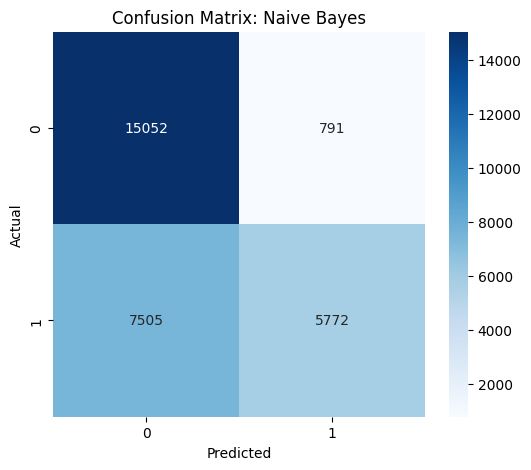

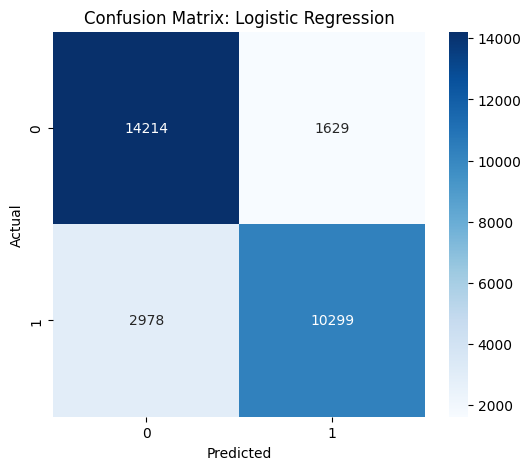

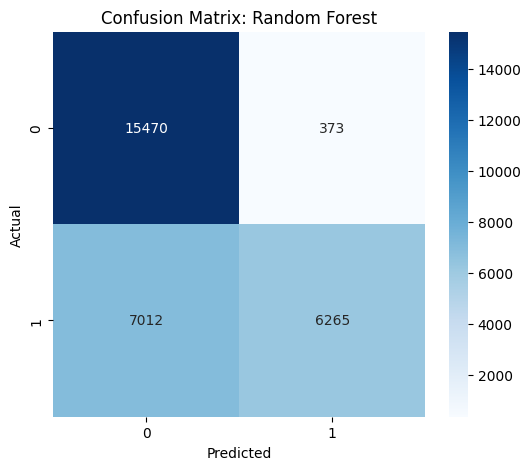

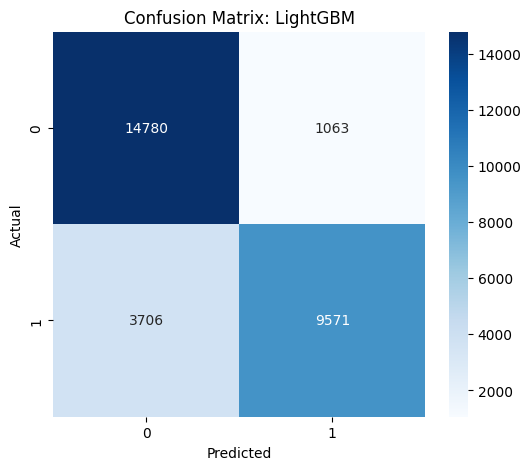

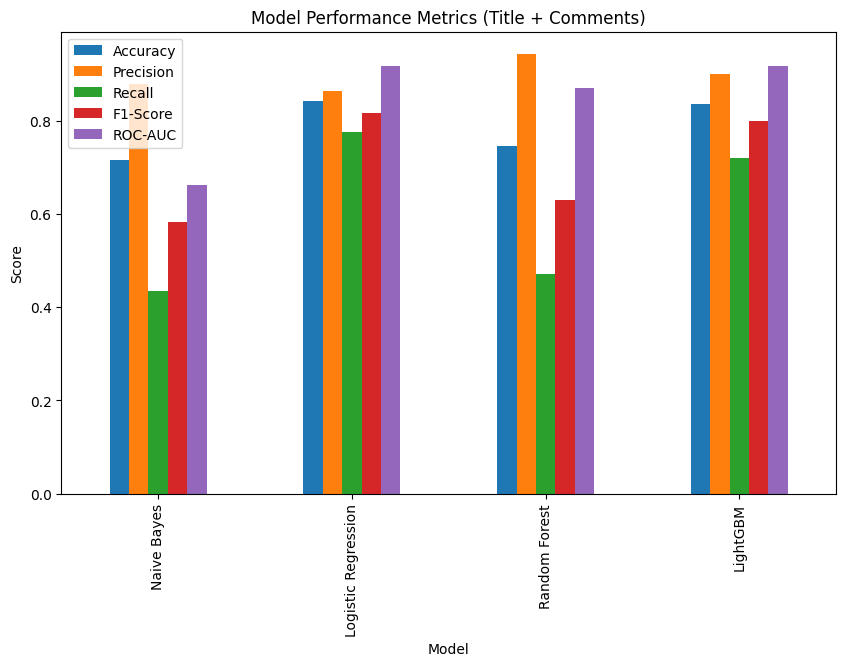

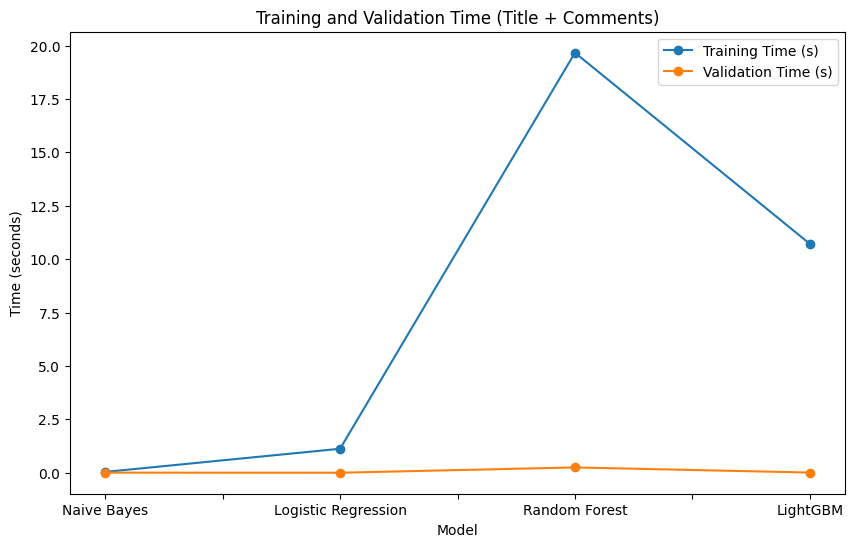

In [ ]:
# Results DataFrame for the first part
results_df = pd.DataFrame(results)
print("\nValidation Results (Title + Comments):")
print(results_df)

# Save results to CSV
results_df.to_csv('validation_results_part1_title_comments.csv', index=False)

# Visualization: Confusion Matrices
for model_result in results:
    conf_matrix = model_result.get("Confusion Matrix", None)
    if conf_matrix is not None:
        model_name = model_result["Model"]
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {model_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

# Bar Plot for Metrics
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Metrics (Title + Comments)")
plt.ylabel("Score")
plt.show()

# Line Plot for Runtime
results_df.set_index("Model")[["Training Time (s)", "Validation Time (s)"]].plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Training and Validation Time (Title + Comments)")
plt.ylabel("Time (seconds)")
plt.show()


τελικο ολα τα μοντελα με ολα τα αποτελεσματα με τη χρηση τιτλου + σχολιων

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Paths to your datasets in Google Drive
base_path = '/content/drive/MyDrive/MSc Artificial Intelligence/Professional Practice & Research Methodology/Fakeddit dataset'
train_file = base_path + '/all_train.tsv'
test_file = base_path + '/all_test_public.tsv'
validate_file = base_path + '/all_validate.tsv'
comments_file = base_path + '/all_comments.tsv'

# Load the datasets
df_train = pd.read_csv(train_file, sep='\t')
df_test = pd.read_csv(test_file, sep='\t')
df_validate = pd.read_csv(validate_file, sep='\t')
df_comments = pd.read_csv(comments_file, sep='\t', engine='python')

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']
for df in [df_train, df_test, df_validate]:
    df.drop(columns=columns_to_drop, inplace=True)
df_comments.drop(columns=['Unnamed: 0'], inplace=True)

# Drop linked_submission_id
for df in [df_train, df_test, df_validate]:
    df.drop(columns=['linked_submission_id'], inplace=True)

# Fill missing values
for df in [df_train, df_test, df_validate]:
    df['domain'].fillna("unknown", inplace=True)
    df['author'].fillna("unknown", inplace=True)
    df['image_url'].fillna("no_image", inplace=True)
    df['title'].fillna("missing", inplace=True)
    df['clean_title'].fillna("missing", inplace=True)
    df['num_comments'].fillna(0, inplace=True)
    df['upvote_ratio'].fillna(df['upvote_ratio'].mean(), inplace=True)

df_comments['author'].fillna("unknown", inplace=True)
df_comments['body'].fillna("missing", inplace=True)
df_comments['parent_id'].fillna("missing", inplace=True)
df_comments['submission_id'].fillna("missing", inplace=True)
df_comments['ups'].fillna(0, inplace=True)

# Combine Train and Validate datasets
df_combined = pd.concat([df_train, df_validate])

# Reduce dataset size to 20% while maintaining class distribution
df_reduced, _ = train_test_split(df_combined, test_size=0.8, stratify=df_combined['2_way_label'], random_state=42)

# Split reduced dataset into Train, Validate, and Test sets
df_train_new, df_temp = train_test_split(df_reduced, test_size=0.3, stratify=df_reduced['2_way_label'], random_state=42)
df_validate_new, df_test_new = train_test_split(df_temp, test_size=0.5, stratify=df_temp['2_way_label'], random_state=42)

# Aggregate comments by submission_id
df_comments_aggregated = df_comments.groupby('submission_id')['body'].apply(
    lambda x: ' '.join(x.dropna())
).reset_index()

# Merge aggregated comments with Train, Validate, and Test datasets
df_train_combined = df_train_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_validate_combined = df_validate_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_test_combined = df_test_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')

# Combine title and comments into a single feature
df_train_combined['combined_text'] = df_train_combined['title'].fillna('') + " " + df_train_combined['body'].fillna('')
df_validate_combined['combined_text'] = df_validate_combined['title'].fillna('') + " " + df_validate_combined['body'].fillna('')
df_test_combined['combined_text'] = df_test_combined['title'].fillna('') + " " + df_test_combined['body'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_train_combined = tfidf.fit_transform(df_train_combined['combined_text'])
X_validate_combined = tfidf.transform(df_validate_combined['combined_text'])
X_test_combined = tfidf.transform(df_test_combined['combined_text'])

y_train = df_train_combined['2_way_label']
y_validate = df_validate_combined['2_way_label']
y_test = df_test_combined['2_way_label']

# Function to run experiments and track metrics
def run_experiment_with_metrics(model, X_train, y_train, X_validate, y_validate, model_name):
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_validate = time.time()
    val_preds = model.predict(X_validate)
    validate_time = time.time() - start_validate

    val_accuracy = accuracy_score(y_validate, val_preds)
    val_precision = precision_score(y_validate, val_preds, average='binary')
    val_recall = recall_score(y_validate, val_preds, average='binary')
    val_f1 = f1_score(y_validate, val_preds, average='binary')
    val_roc_auc = roc_auc_score(y_validate, model.predict_proba(X_validate)[:, 1])
    conf_matrix = confusion_matrix(y_validate, val_preds)

    return {
        'Model': model_name,
        'Accuracy': val_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1-Score': val_f1,
        'ROC-AUC': val_roc_auc,
        'Training Time (s)': train_time,
        'Validation Time (s)': validate_time,
        'Confusion Matrix': conf_matrix
    }

# Evaluate models
results = []
conf_matrices = {}

# Naive Bayes
nb_model = MultinomialNB()
nb_metrics = run_experiment_with_metrics(nb_model, X_train_combined, y_train, X_validate_combined, y_validate, "Naive Bayes")
results.append(nb_metrics)
conf_matrices["Naive Bayes"] = nb_metrics["Confusion Matrix"]

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_metrics = run_experiment_with_metrics(lr_model, X_train_combined, y_train, X_validate_combined, y_validate, "Logistic Regression")
results.append(lr_metrics)
conf_matrices["Logistic Regression"] = lr_metrics["Confusion Matrix"]

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_metrics = run_experiment_with_metrics(rf_model, X_train_combined, y_train, X_validate_combined, y_validate, "Random Forest")
results.append(rf_metrics)
conf_matrices["Random Forest"] = rf_metrics["Confusion Matrix"]

# LightGBM
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=10, random_state=42)
lgbm_metrics = run_experiment_with_metrics(lgbm_model, X_train_combined, y_train, X_validate_combined, y_validate, "LightGBM")
results.append(lgbm_metrics)
conf_matrices["LightGBM"] = lgbm_metrics["Confusion Matrix"]


Mounted at /content/drive


<ipython-input-2-0c8ecc7995c4>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['domain'].fillna("unknown", inplace=True)
<ipython-input-2-0c8ecc7995c4>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

[LightGBM] [Info] Number of positive: 61960, number of negative: 73932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.645072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 502374
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 2000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455950 -> initscore=-0.176657
[LightGBM] [Info] Start training from score -0.176657


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Epoch 1/5
2124/2124 [==============================] - 17s 8ms/step - loss: 0.3555 - accuracy: 0.8361 - val_loss: 0.3090 - val_accuracy: 0.8614
Epoch 2/5
2124/2124 [==============================] - 16s 8ms/step - loss: 0.2861 - accuracy: 0.8753 - val_loss: 0.2974 - val_accuracy: 0.8662
Epoch 3/5
2124/2124 [==============================] - 16s 8ms/step - loss: 0.2448 - accuracy: 0.8970 - val_loss: 0.2976 - val_accuracy: 0.8680
Epoch 4/5
2124/2124 [==============================] - 16s 8ms/step - loss: 0.2038 - accuracy: 0.9169 - val_loss: 0.3041 - val_accuracy: 0.8687
Epoch 5/5
910/910 [==============================] - 2s 2ms/step


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
8494/8494 [==============================] - 664s 77ms/step - loss: 0.2509 - accuracy: 0.8927
Epoch 2/3
8494/8494 [==============================] - 655s 77ms/step - loss: 0.1747 - accuracy: 0.9301
Epoch 3/3
1820/1820 [==============================] - 51s 28ms/step
Epoch 1/3
4247/4247 [==============================] - 661s 154ms/step - loss: 0.3376 - accuracy: 0.8426 - val_loss: 0.2860 - val_accuracy: 0.8701
Epoch 2/3
4247/4247 [==============================] - 656s 154ms/step - loss: 0.2591 - accuracy: 0.8875 - val_loss: 0.2723 - val_accuracy: 0.8816
Epoch 3/3
910/910 [==============================] - 25s 27ms/step

Validation Results:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0          Naive Bayes  0.725962   0.862560  0.474580  0.612283  0.770243   
1  Logistic Regression  0.842445   0.856136  0.786623  0.819909  0.922598   
2        Random Forest  0.745570   0.942400  0.470739  0.627857  0.878716   
3             LightGBM  0.838324 

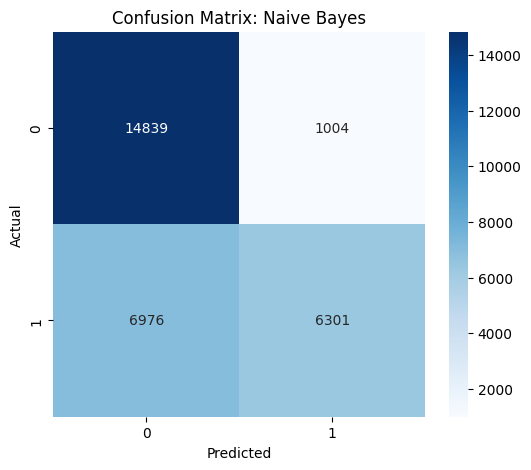

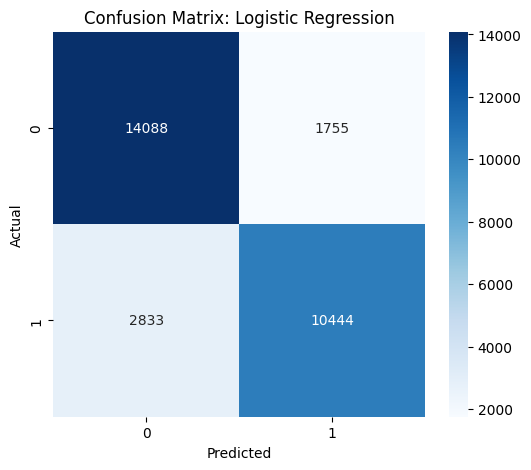

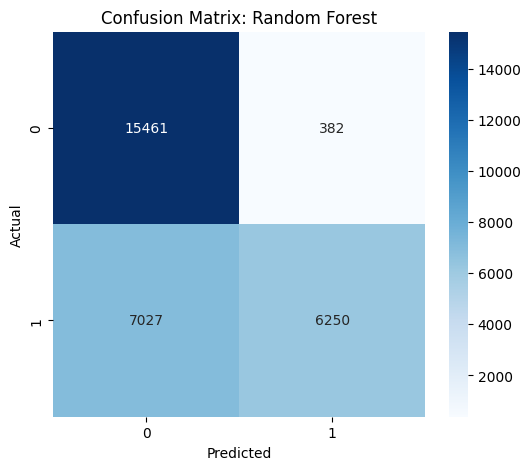

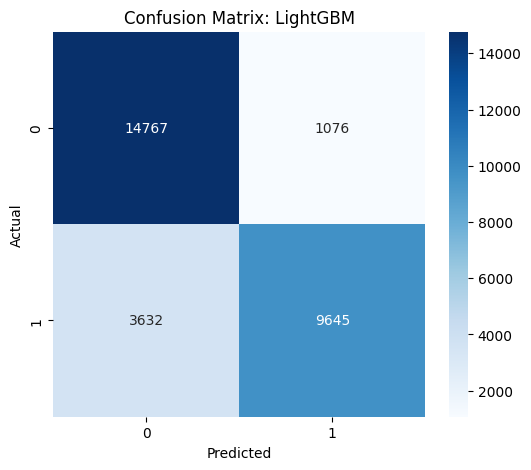

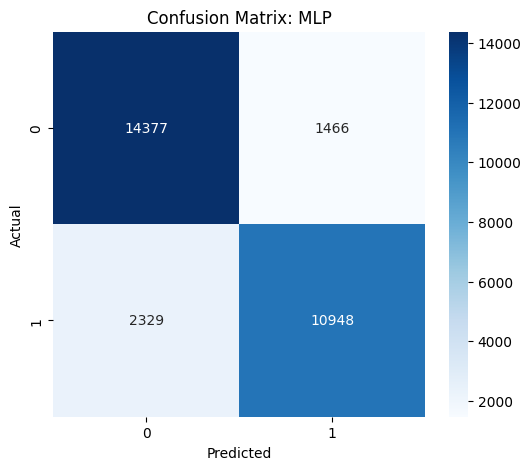

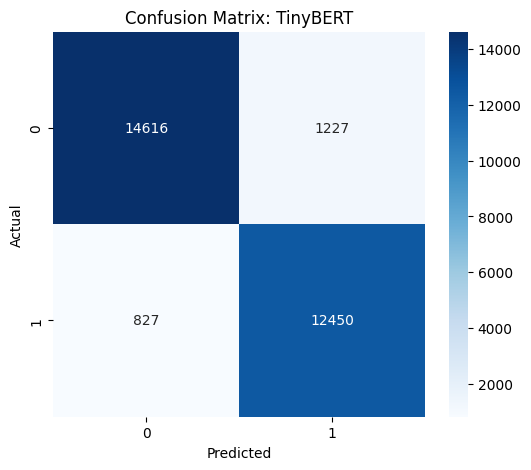

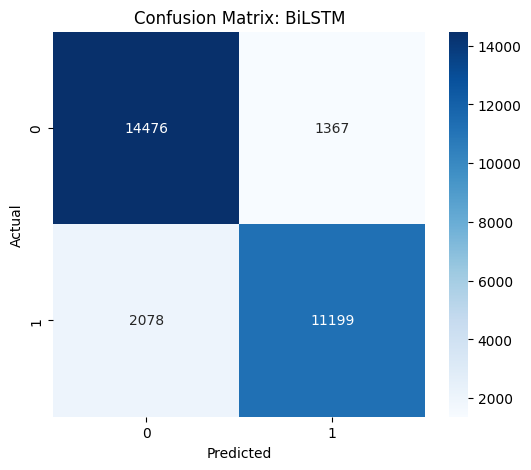

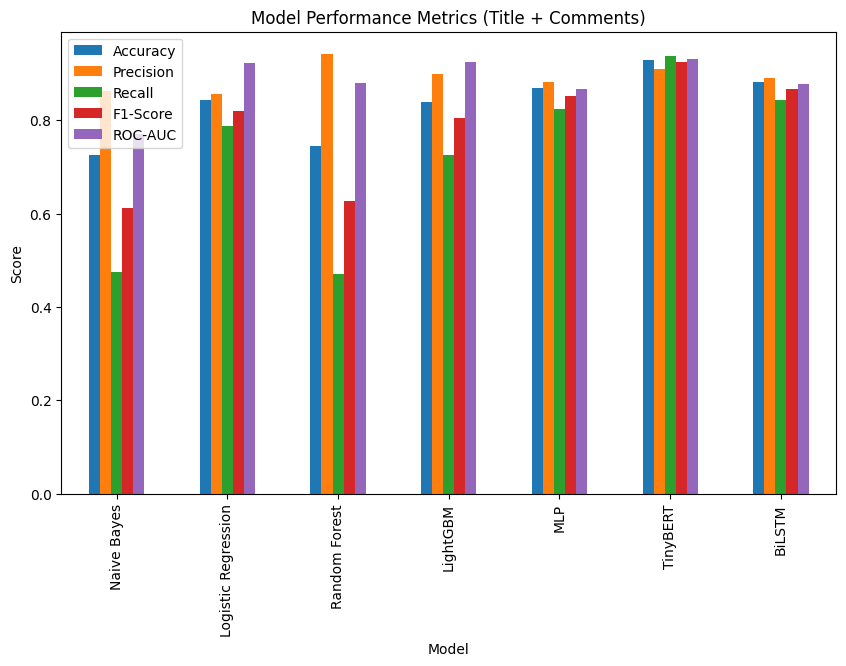

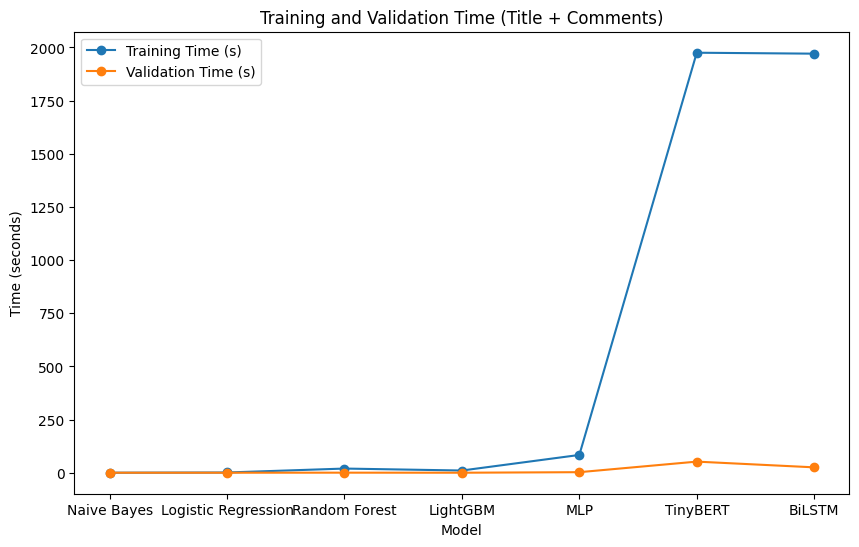

In [ ]:
# MLP Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Standardize the TF-IDF features for MLP
scaler = StandardScaler(with_mean=False)  # `with_mean=False` is required for sparse matrices
X_train_dense = scaler.fit_transform(X_train_combined).toarray()  # Convert to dense array
X_validate_dense = scaler.transform(X_validate_combined).toarray()  # Convert to dense array

# MLP Model
def train_mlp(X_train, y_train, X_validate, y_validate):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Training
    start_train = time.time()
    model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=5, batch_size=64, verbose=1)
    train_time = time.time() - start_train

    # Validation
    start_validate = time.time()
    val_preds = (model.predict(X_validate) > 0.5).astype("int32").flatten()
    validate_time = time.time() - start_validate

    # Metrics
    metrics = {
        'Model': "MLP",
        'Accuracy': accuracy_score(y_validate, val_preds),
        'Precision': precision_score(y_validate, val_preds),
        'Recall': recall_score(y_validate, val_preds),
        'F1-Score': f1_score(y_validate, val_preds),
        'ROC-AUC': roc_auc_score(y_validate, val_preds),
        'Training Time (s)': train_time,
        'Validation Time (s)': validate_time,
        'Confusion Matrix': confusion_matrix(y_validate, val_preds)
    }
    return model, metrics

# Train MLP
mlp_model, mlp_metrics = train_mlp(X_train_dense, y_train, X_validate_dense, y_validate)
results.append(mlp_metrics)
conf_matrices["MLP"] = mlp_metrics["Confusion Matrix"]

# TinyBERT Model
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
tokenizer = BertTokenizer.from_pretrained('google/bert_uncased_L-2_H-128_A-2')
model_tinybert = TFBertForSequenceClassification.from_pretrained('google/bert_uncased_L-2_H-128_A-2', num_labels=2)

train_encodings = tokenizer(
    list(df_train_combined['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="tf"
)
validate_encodings = tokenizer(
    list(df_validate_combined['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="tf"
)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(16)
validate_dataset = tf.data.Dataset.from_tensor_slices((dict(validate_encodings), y_validate)).batch(16)

model_tinybert.compile(optimizer=Adam(learning_rate=5e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

start_train = time.time()
model_tinybert.fit(train_dataset, epochs=3, verbose=1)
train_time = time.time() - start_train

start_validate = time.time()
val_preds = model_tinybert.predict(validate_dataset)
validate_time = time.time() - start_validate

tinybert_metrics = {
    'Model': "TinyBERT",
    'Accuracy': accuracy_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
    'Precision': precision_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
    'Recall': recall_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
    'F1-Score': f1_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
    'ROC-AUC': roc_auc_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
    'Training Time (s)': train_time,
    'Validation Time (s)': validate_time,
    'Confusion Matrix': confusion_matrix(y_validate, tf.argmax(val_preds.logits, axis=1))
}
results.append(tinybert_metrics)
conf_matrices["TinyBERT"] = tinybert_metrics["Confusion Matrix"]

# BiLSTM Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

tokenizer_bilstm = Tokenizer(num_words=5000)
tokenizer_bilstm.fit_on_texts(df_train_combined['combined_text'])
X_train_seq = pad_sequences(tokenizer_bilstm.texts_to_sequences(df_train_combined['combined_text']), maxlen=128)
X_validate_seq = pad_sequences(tokenizer_bilstm.texts_to_sequences(df_validate_combined['combined_text']), maxlen=128)

model_bilstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=128),
    Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_train = time.time()
model_bilstm.fit(X_train_seq, y_train, validation_data=(X_validate_seq, y_validate), epochs=3, batch_size=32, verbose=1)
train_time = time.time() - start_train

start_validate = time.time()
val_preds = (model_bilstm.predict(X_validate_seq) > 0.5).astype("int32").flatten()
validate_time = time.time() - start_validate
# Re
bilstm_metrics = {
    'Model': "BiLSTM",
    'Accuracy': accuracy_score(y_validate, val_preds),
    'Precision': precision_score(y_validate, val_preds),
    'Recall': recall_score(y_validate, val_preds),
    'F1-Score': f1_score(y_validate, val_preds),
    'ROC-AUC': roc_auc_score(y_validate, val_preds),
    'Training Time (s)': train_time,
    'Validation Time (s)': validate_time,
    'Confusion Matrix': confusion_matrix(y_validate, val_preds)
}
results.append(bilstm_metrics)
conf_matrices["BiLSTM"] = bilstm_metrics["Confusion Matrix"]

# Results DataFrame
results_df = pd.DataFrame(results)
print("\nValidation Results:")
print(results_df)

# Save results to CSV
results_df.to_csv('validation_results_title_comments.csv', index=False)

# Visualization
# Plot Confusion Matrices
for model_name, conf_matrix in conf_matrices.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Bar Plot for Metrics
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Metrics (Title + Comments)")
plt.ylabel("Score")
plt.show()

# Line Plot for Runtime
results_df.set_index("Model")[["Training Time (s)", "Validation Time (s)"]].plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Training and Validation Time (Title + Comments)")
plt.ylabel("Time (seconds)")
plt.show()









τελικο με προσθηκη ram τιτλος και σχολια 27_01

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import time
import psutil
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Paths to datasets
base_path = '/content/drive/MyDrive/MSc Artificial Intelligence/Professional Practice & Research Methodology/Fakeddit dataset'
train_file = base_path + '/all_train.tsv'
test_file = base_path + '/all_test_public.tsv'
validate_file = base_path + '/all_validate.tsv'
comments_file = base_path + '/all_comments.tsv'

# Load the datasets
df_train = pd.read_csv(train_file, sep='\t')
df_test = pd.read_csv(test_file, sep='\t')
df_validate = pd.read_csv(validate_file, sep='\t')
df_comments = pd.read_csv(comments_file, sep='\t', engine='python')

# Preprocessing
columns_to_drop = ['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']
for df in [df_train, df_test, df_validate]:
    df.drop(columns=columns_to_drop, inplace=True)
df_comments.drop(columns=['Unnamed: 0'], inplace=True)

for df in [df_train, df_test, df_validate]:
    df.drop(columns=['linked_submission_id'], inplace=True)
    df.fillna({
        'domain': 'unknown',
        'author': 'unknown',
        'image_url': 'no_image',
        'title': 'missing',
        'clean_title': 'missing',
        'num_comments': 0,
        'upvote_ratio': df['upvote_ratio'].mean(),
    }, inplace=True)
df_comments.fillna({'author': 'unknown', 'body': 'missing', 'parent_id': 'missing', 'submission_id': 'missing', 'ups': 0}, inplace=True)

# Combine Train and Validate datasets
df_combined = pd.concat([df_train, df_validate])
df_reduced, _ = train_test_split(df_combined, test_size=0.8, stratify=df_combined['2_way_label'], random_state=42)
df_train_new, df_temp = train_test_split(df_reduced, test_size=0.3, stratify=df_reduced['2_way_label'], random_state=42)
df_validate_new, df_test_new = train_test_split(df_temp, test_size=0.5, stratify=df_temp['2_way_label'], random_state=42)

# Aggregate comments by submission_id
df_comments_aggregated = df_comments.groupby('submission_id')['body'].apply(lambda x: ' '.join(x.dropna())).reset_index()

# Merge aggregated comments with Train, Validate, and Test datasets
df_train_combined = df_train_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_validate_combined = df_validate_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')
df_test_combined = df_test_new.merge(df_comments_aggregated, left_on='id', right_on='submission_id', how='left')

# Combine title and comments into a single feature
df_train_combined['combined_text'] = df_train_combined['title'].fillna('') + " " + df_train_combined['body'].fillna('')
df_validate_combined['combined_text'] = df_validate_combined['title'].fillna('') + " " + df_validate_combined['body'].fillna('')
df_test_combined['combined_text'] = df_test_combined['title'].fillna('') + " " + df_test_combined['body'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_train_combined = tfidf.fit_transform(df_train_combined['combined_text'])
X_validate_combined = tfidf.transform(df_validate_combined['combined_text'])
X_test_combined = tfidf.transform(df_test_combined['combined_text'])

y_train = df_train_combined['2_way_label']
y_validate = df_validate_combined['2_way_label']
y_test = df_test_combined['2_way_label']

# Function to track metrics
def run_experiment_with_metrics(model, X_train, y_train, X_validate, y_validate, model_name):
    initial_ram = psutil.virtual_memory().used / 1e9
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_validate = time.time()
    val_preds = model.predict(X_validate)
    validate_time = time.time() - start_validate
    ram_used = psutil.virtual_memory().used / 1e9 - initial_ram

    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_validate, val_preds),
        'Precision': precision_score(y_validate, val_preds),
        'Recall': recall_score(y_validate, val_preds),
        'F1-Score': f1_score(y_validate, val_preds),
        'ROC-AUC': roc_auc_score(y_validate, model.predict_proba(X_validate)[:, 1]),
        'Training Time (s)': train_time,
        'Validation Time (s)': validate_time,
        'RAM Used (GB)': ram_used,
        'Confusion Matrix': confusion_matrix(y_validate, val_preds),
    }

results = []
conf_matrices = {}

# Evaluate Models
nb_model = MultinomialNB()
results.append(run_experiment_with_metrics(nb_model, X_train_combined, y_train, X_validate_combined, y_validate, "Naive Bayes"))

lr_model = LogisticRegression(max_iter=1000)
results.append(run_experiment_with_metrics(lr_model, X_train_combined, y_train, X_validate_combined, y_validate, "Logistic Regression"))

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(run_experiment_with_metrics(rf_model, X_train_combined, y_train, X_validate_combined, y_validate, "Random Forest"))

lgbm_model = LGBMClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(run_experiment_with_metrics(lgbm_model, X_train_combined, y_train, X_validate_combined, y_validate, "LightGBM"))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61960, number of negative: 73932
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.528116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 502374
[LightGBM] [Info] Number of data points in the train set: 135892, number of used features: 2000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455950 -> initscore=-0.176657
[LightGBM] [Info] Start training from score -0.176657


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Epoch 1/5
2124/2124 [==============================] - 19s 8ms/step - loss: 0.3543 - accuracy: 0.8358 - val_loss: 0.3086 - val_accuracy: 0.8616
Epoch 2/5
2124/2124 [==============================] - 17s 8ms/step - loss: 0.2863 - accuracy: 0.8752 - val_loss: 0.2974 - val_accuracy: 0.8678
Epoch 3/5
2124/2124 [==============================] - 17s 8ms/step - loss: 0.2454 - accuracy: 0.8963 - val_loss: 0.2961 - val_accuracy: 0.8706
Epoch 4/5
2124/2124 [==============================] - 17s 8ms/step - loss: 0.2038 - accuracy: 0.9171 - val_loss: 0.3183 - val_accuracy: 0.8684
Epoch 5/5
910/910 [==============================] - 2s 2ms/step


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
8494/8494 [==============================] - 676s 79ms/step - loss: 0.2504 - accuracy: 0.8928
Epoch 2/3
8494/8494 [==============================] - 670s 79ms/step - loss: 0.1741 - accuracy: 0.9306
Epoch 3/3
1820/1820 [==============================] - 52s 28ms/step
Epoch 1/3
4247/4247 [==============================] - 670s 156ms/step - loss: 0.3266 - accuracy: 0.8495 - val_loss: 0.2823 - val_accuracy: 0.8761
Epoch 2/3
4247/4247 [==============================] - 661s 156ms/step - loss: 0.2601 - accuracy: 0.8869 - val_loss: 0.2706 - val_accuracy: 0.8830
Epoch 3/3
910/910 [==============================] - 26s 29ms/step

Validation Results (Title + Comments):
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0          Naive Bayes  0.725962   0.862560  0.474580  0.612283  0.770243   
1  Logistic Regression  0.842445   0.856136  0.786623  0.819909  0.922598   
2        Random Forest  0.745570   0.942400  0.470739  0.627857  0.878716   
3             

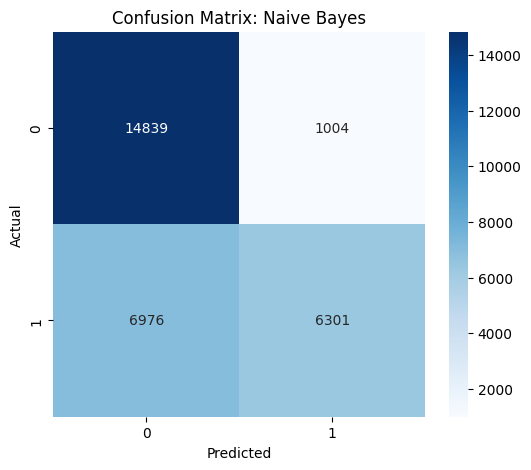

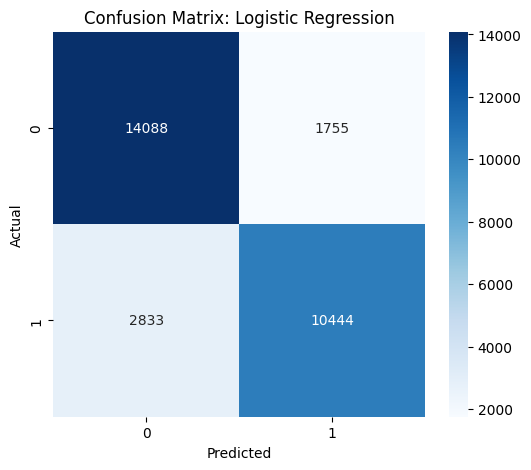

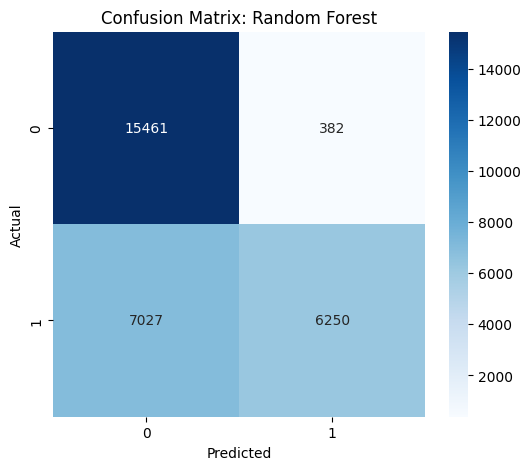

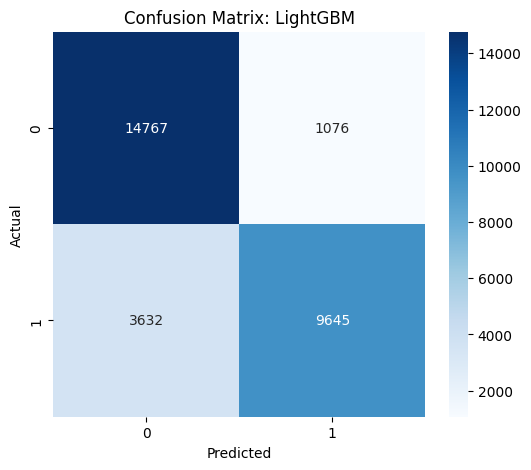

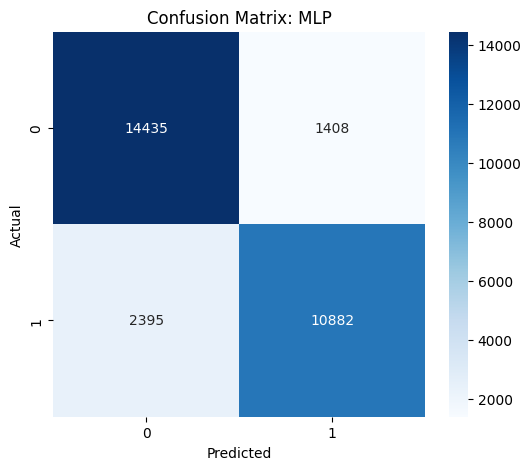

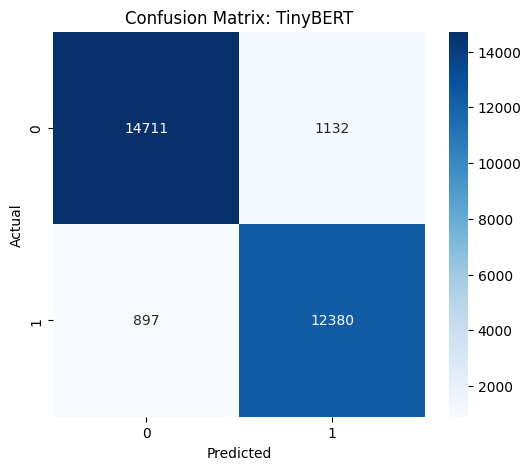

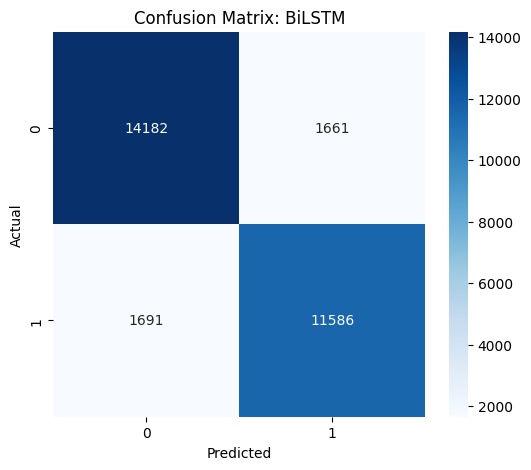

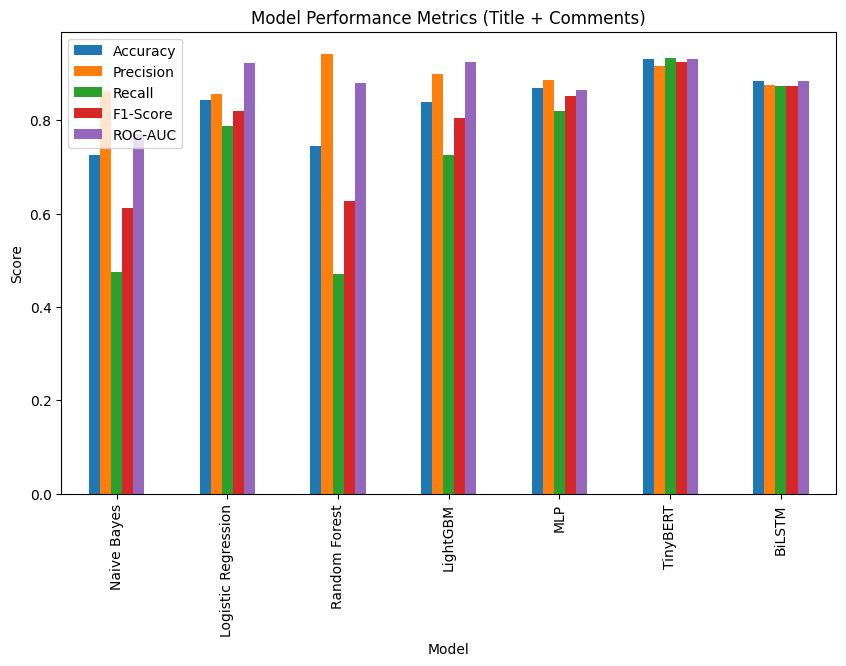

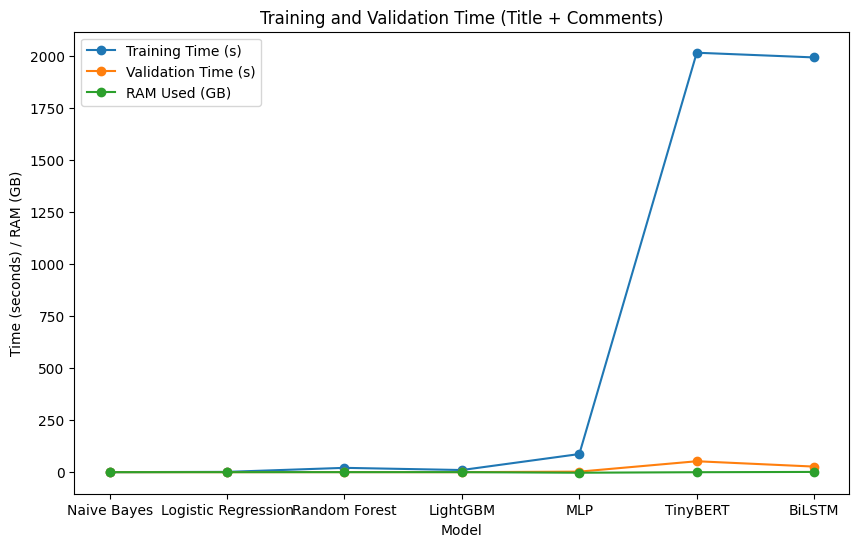

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional

# Standardize TF-IDF Features for MLP
scaler = StandardScaler(with_mean=False)
X_train_dense = scaler.fit_transform(X_train_combined).toarray()
X_validate_dense = scaler.transform(X_validate_combined).toarray()

# MLP Model
def train_mlp(X_train, y_train, X_validate, y_validate):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Track RAM and time
    initial_ram = psutil.virtual_memory().used / 1e9
    start_train = time.time()
    model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=5, batch_size=64, verbose=1)
    train_time = time.time() - start_train
    ram_used = psutil.virtual_memory().used / 1e9 - initial_ram

    # Validation
    start_validate = time.time()
    val_preds = (model.predict(X_validate) > 0.5).astype("int32").flatten()
    validate_time = time.time() - start_validate

    return {
        'Model': "MLP",
        'Accuracy': accuracy_score(y_validate, val_preds),
        'Precision': precision_score(y_validate, val_preds),
        'Recall': recall_score(y_validate, val_preds),
        'F1-Score': f1_score(y_validate, val_preds),
        'ROC-AUC': roc_auc_score(y_validate, val_preds),
        'Training Time (s)': train_time,
        'Validation Time (s)': validate_time,
        'RAM Used (GB)': ram_used,
        'Confusion Matrix': confusion_matrix(y_validate, val_preds),
    }

results.append(train_mlp(X_train_dense, y_train, X_validate_dense, y_validate))

# TinyBERT Model
tokenizer = BertTokenizer.from_pretrained('google/bert_uncased_L-2_H-128_A-2')
model_tinybert = TFBertForSequenceClassification.from_pretrained('google/bert_uncased_L-2_H-128_A-2', num_labels=2)

train_encodings = tokenizer(
    list(df_train_combined['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="tf"
)
validate_encodings = tokenizer(
    list(df_validate_combined['combined_text']), truncation=True, padding=True, max_length=128, return_tensors="tf"
)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(16)
validate_dataset = tf.data.Dataset.from_tensor_slices((dict(validate_encodings), y_validate)).batch(16)

def train_tinybert(model, train_dataset, validate_dataset, y_validate):
    initial_ram = psutil.virtual_memory().used / 1e9
    start_train = time.time()
    model.compile(optimizer=Adam(learning_rate=5e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    model.fit(train_dataset, epochs=3, verbose=1)
    train_time = time.time() - start_train
    ram_used = psutil.virtual_memory().used / 1e9 - initial_ram

    start_validate = time.time()
    val_preds = model.predict(validate_dataset)
    validate_time = time.time() - start_validate

    return {
        'Model': "TinyBERT",
        'Accuracy': accuracy_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
        'Precision': precision_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
        'Recall': recall_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
        'F1-Score': f1_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
        'ROC-AUC': roc_auc_score(y_validate, tf.argmax(val_preds.logits, axis=1)),
        'Training Time (s)': train_time,
        'Validation Time (s)': validate_time,
        'RAM Used (GB)': ram_used,
        'Confusion Matrix': confusion_matrix(y_validate, tf.argmax(val_preds.logits, axis=1)),
    }

results.append(train_tinybert(model_tinybert, train_dataset, validate_dataset, y_validate))

# BiLSTM Model
tokenizer_bilstm = Tokenizer(num_words=5000)
tokenizer_bilstm.fit_on_texts(df_train_combined['combined_text'])
X_train_seq = pad_sequences(tokenizer_bilstm.texts_to_sequences(df_train_combined['combined_text']), maxlen=128)
X_validate_seq = pad_sequences(tokenizer_bilstm.texts_to_sequences(df_validate_combined['combined_text']), maxlen=128)

model_bilstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=128),
    Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

def train_bilstm(model, X_train, y_train, X_validate, y_validate):
    initial_ram = psutil.virtual_memory().used / 1e9
    start_train = time.time()
    model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=3, batch_size=32, verbose=1)
    train_time = time.time() - start_train
    ram_used = psutil.virtual_memory().used / 1e9 - initial_ram

    start_validate = time.time()
    val_preds = (model.predict(X_validate) > 0.5).astype("int32").flatten()
    validate_time = time.time() - start_validate

    return {
        'Model': "BiLSTM",
        'Accuracy': accuracy_score(y_validate, val_preds),
        'Precision': precision_score(y_validate, val_preds),
        'Recall': recall_score(y_validate, val_preds),
        'F1-Score': f1_score(y_validate, val_preds),
        'ROC-AUC': roc_auc_score(y_validate, val_preds),
        'Training Time (s)': train_time,
        'Validation Time (s)': validate_time,
        'RAM Used (GB)': ram_used,
        'Confusion Matrix': confusion_matrix(y_validate, val_preds),
    }

results.append(train_bilstm(model_bilstm, X_train_seq, y_train, X_validate_seq, y_validate))

# Results and Visualization
results_df = pd.DataFrame(results)
print("\nValidation Results (Title + Comments):")
print(results_df)

# Save results to CSV
results_df.to_csv('validation_results_title_comments.csv', index=False)

# Visualization
for model_name, conf_matrix in results_df.set_index("Model")["Confusion Matrix"].items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Bar Plot for Metrics
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Metrics (Title + Comments)")
plt.ylabel("Score")
plt.show()

# Line Plot for Runtime
results_df.set_index("Model")[["Training Time (s)", "Validation Time (s)", "RAM Used (GB)"]].plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Training and Validation Time (Title + Comments)")
plt.ylabel("Time (seconds) / RAM (GB)")
plt.show()

